# this implementation is used to recognize numbers from 0 to 9
                           this exercise handles relatively huge data so it may be slow

In [1]:
import numpy as np
import scipy.io as sio
import neural_network as nn

In [2]:
# Load Training Data 

mat_data = sio.loadmat('ex3data1.mat')
data=np.hstack([mat_data['X'],mat_data['y']])
X=data[:,:-1]
y=data[:,-1:].flatten()
m, n = X.shape
print("Shape of input data:",m,n)


Shape of input data: 5000 400


In [3]:
#defining object of nn and shuffling data
clf=nn.nn()
clf.shuffle_in_unison(X,y)

In [4]:
#normalising data and initialising different variables
X,_=clf.normalize(X)
alpha=2
iterations=200
LAMBDA=0
hidden_layer_structure=np.array([25])

In [5]:
#dividing training data and testing data in the ratio - 70% : 30%

X_train=X[:(7*m)//10,:]
y_train=y[:(7*m)//10]
X_test=X[(7*m)//10:,:]
y_test=y[(7*m)//10:]

In [6]:
#optimizing parameters
clf.fit(X_train,y_train,hidden_layer_structure)
parameters=clf.gradient_descent(alpha,iterations,LAMBDA)

labels are: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


  -------------------------------------------Some Predictions---------------------------------------------------

In [7]:
indices=np.random.choice(m,10)
print("Test set:      ",y[indices])
print("My predictions:",clf.predict(X[indices,:]))

Test set:       [6. 3. 3. 4. 1. 1. 7. 3. 2. 4.]
My predictions: [6. 3. 3. 2. 1. 1. 7. 3. 2. 4.]


-------------------------------------------Plotting Learning Curve-------------------------------------------------------------

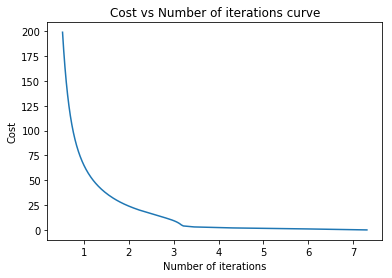

In [8]:
clf.plot_learning_curve()

-------------------------------------Calculating accuracy--------------------------------------------------------------------

In [9]:
#Calculating accuracy
print("accuracy of my model= %0.2f" %clf.accuracy(X_test,y_test),"%")

accuracy of my model= 90.33 %


In [10]:
#calculating accuracy of sklearn model
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(25))
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
A=(y_pred==y_test)
acc=np.mean(A)*100
print("accuracy of sklearn= %0.2f" %acc,"%")

accuracy of sklearn= 91.47 %
